In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir = '/kaggle/input/classificationmodel/train'
validation_dir = '/kaggle/input/classificationmodel/validation'
test_dir = '/kaggle/input/classificationmodel/test'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# it also involves to decode jpeg into RGB pixels

In [6]:
# Generating the batches for tensor image
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_gen = train_datagen.flow_from_directory(train_dir,
                                             target_size=(150,150),
                                             batch_size=20,
                                             class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [8]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3),activation='relu',input_shape = (150,150,3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64, (3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

2023-02-07 04:59:11.019964: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-07 04:59:11.021013: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-07 04:59:11.142712: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-07 04:59:11.143754: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-07 04:59:11.144610: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [ ]:
model.summary()

In [9]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [10]:
history = model.fit_generator(
      train_gen,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2023-02-07 04:59:25.002988: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2023-02-07 04:59:27.334198: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


100/100 [==============================] - 30s 196ms/step - loss: 0.6945 - acc: 0.5040 - val_loss: 0.6833 - val_acc: 0.5070
Epoch 2/20
100/100 [==============================] - 12s 125ms/step - loss: 0.6668 - acc: 0.6035 - val_loss: 0.6693 - val_acc: 0.5690
Epoch 3/20
100/100 [==============================] - 13s 131ms/step - loss: 0.6338 - acc: 0.6460 - val_loss: 0.6334 - val_acc: 0.6500
Epoch 4/20
100/100 [==============================] - 12s 119ms/step - loss: 0.5913 - acc: 0.6905 - val_loss: 0.6464 - val_acc: 0.6360
Epoch 5/20
100/100 [==============================] - 12s 124ms/step - loss: 0.5526 - acc: 0.7155 - val_loss: 0.6620 - val_acc: 0.6270
Epoch 6/20
100/100 [==============================] - 12s 119ms/step - loss: 0.5204 - acc: 0.7400 - val_loss: 0.5979 - val_acc: 0.6870
Epoch 7/20
100/100 [==============================] - 12s 120ms/step - loss: 0.4826 - acc: 0.7645 - val_loss: 0.5532 - val_acc: 0.7030
Epoch 8/20
100/100 [==============================] - 13s 126ms/st

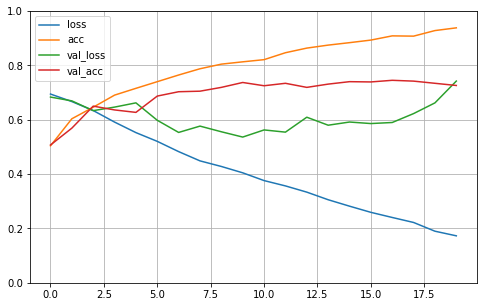

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
#clear sign of overfitting since. See the graph of val acc and acc

In [14]:
del model

In [15]:
keras.backend.clear_session()

### Using the transfer learning rate from VGG16

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
from tensorflow.keras.applications import VGG16

con_base = VGG16(weights = 'imagenet',
                include_top = False,
                input_shape = (150,150,3))

58900480/58889256 [==============================] - 0s 0us/step


In [20]:
con_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [21]:
con_base.trainable = False

In [22]:
from tensorflow import keras

In [23]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(con_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [25]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [26]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=[checkpoint_cb])

Epoch 1/30
100/100 [==============================] - 28s 255ms/step - loss: 0.5988 - acc: 0.6915 - val_loss: 0.4539 - val_acc: 0.8280
Epoch 2/30
100/100 [==============================] - 25s 252ms/step - loss: 0.4915 - acc: 0.7770 - val_loss: 0.3806 - val_acc: 0.8530
Epoch 3/30
100/100 [==============================] - 25s 253ms/step - loss: 0.4378 - acc: 0.8085 - val_loss: 0.3291 - val_acc: 0.8760
Epoch 4/30
100/100 [==============================] - 25s 251ms/step - loss: 0.4062 - acc: 0.8170 - val_loss: 0.3069 - val_acc: 0.8840
Epoch 5/30
100/100 [==============================] - 25s 247ms/step - loss: 0.3859 - acc: 0.8330 - val_loss: 0.2915 - val_acc: 0.8940
Epoch 6/30
100/100 [==============================] - 26s 255ms/step - loss: 0.3799 - acc: 0.8280 - val_loss: 0.2826 - val_acc: 0.8880
Epoch 7/30
100/100 [==============================] - 25s 252ms/step - loss: 0.3665 - acc: 0.8380 - val_loss: 0.2794 - val_acc: 0.8900
Epoch 8/30
100/100 [==============================] - 2

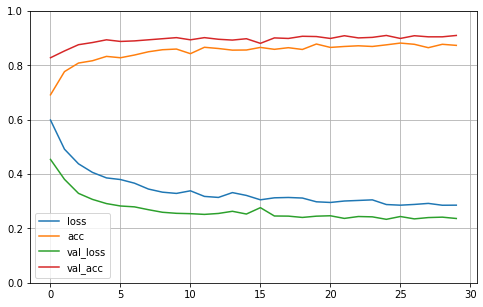

In [27]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
hist_df = pd.DataFrame(history.history) 

In [29]:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [30]:
model.save("modelatkagglegpu.h5")